# The flipping cylinder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import json
from tqdm import tqdm_notebook as tqdm
import matplotlib.patches as patches
import collections
from random import randint
import random
from IPython.display import Image

In [2]:
Image(url= "flip_cube.jpg", width=300, height=300)

In [3]:
colors = {'g': 'green',
          'b': 'blue',
          'y': 'yellow',
          'p': 'purple',
          's': 'grey',
          'o': 'orange',
          'w': 'white',
          'r': 'red'  
        }

In [4]:
diskColors = ["g", "b"]
sideColors = ["y", "p", "s", "o", "w", "r"]

In [5]:
pieces =  it.chain.from_iterable(zip(diskColors,[x,x]) for x in sideColors)  

In [6]:
config = it.permutations(pieces)

In [7]:
start = list(next(config)) 

In [8]:
target = [('g', 'y'),
 ('g', 'p'),
 ('g', 'r'),
 ('g', 'w'),
 ('g', 's'),
 ('g', 'o'),
 ('b', 'y'),
 ('b', 'p'),
 ('b', 'r'),
 ('b', 'w'),
 ('b', 's'),
 ('b', 'o')]

In [9]:
start = [('b', 'p'),
 ('b', 'y'),
 ('b', 's'),
 ('b', 'r'),
 ('b', 'w'),
 ('b', 'o'),
 ('g', 'w'),
 ('g', 'y'),
 ('g', 'r'),
 ('g', 's'),
 ('g', 'p'),
 ('g', 'o')]

In [10]:
def showConfig(cf):
    "graphics representation of the puzzle"
    tt = [a[0] for a in cf][0:6]  
    mt = [a[1] for a in cf][0:6]
    mb = [a[1] for a in cf][6:12]
    bb = [a[0] for a in cf][6:12] 
    
    ax1=plt.subplot(111,aspect='equal')
    ls = tt + mt + mb + bb
    dx, dy = 1/6, 1/4
    pieces = []
    for j in range(24):
        x, cnt = (j%6)/6, j//6+1
        color = colors[ls[j]]
        p = patches.Rectangle(
                    (x,1-cnt/4), dx,dy, edgecolor="white", facecolor=color, fill=True,linewidth=0.5 )
        pieces.append(p)
    
    for p in pieces: ax1.add_patch(p)
    plt.axis('off')
    plt.show()   

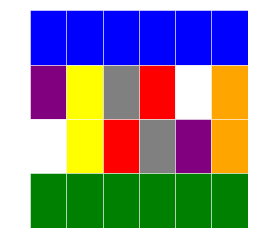

In [11]:
showConfig(start)

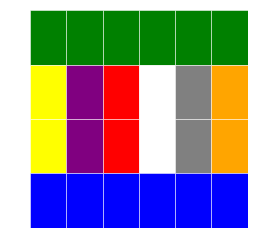

In [12]:
showConfig(target)

## Operations affecting a given configuration 

In [13]:
def halfFlip(cf):
    lst = cf*1
    lst[0],lst[1],lst[2],lst[6],lst[7],lst[8] = lst[8],lst[7],lst[6], lst[2], lst[1], lst[0]
    return lst

In [14]:
def totalRot(n, cf):
    t, b = cf[0:6], cf[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(n)
    b.rotate(n)
    return list(t+b)

In [15]:
def topRot(n, cf):
    t, b = cf[0:6], cf[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(n)
    b.rotate(0)
    return list(t+b)

In [16]:
def bottRot(n, cf):
    t, b = cf[0:6], cf[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(0)
    b.rotate(n)
    return list(t+b)

In [17]:
def flip(cf):
    cf.reverse()
    return cf

Now, a given configuration defines a  class of equivalence in a natural way by means of flipping a rotating the cylinder as a whole. 

In [18]:
def equiv_class(cf):
    "flippings and  (whole) rotations of a given configuration of the  puzzel "
    ec = []
    for n in range(6):
        tR = totalRot(n,cf)
        ec.append(tR)
        tR.reverse()
        ec.append(tR)
    return ec

In [19]:
def check_identity(x,y):
    d, S = False, equiv_class(y)
    if S.count(x) > 0: d = True
    return d

## The metric space

If  *cf* and  *cg* are given configurations, then the geodesic distance,    defined as the minimum number of operations  necessary to go from *cf* to *cg*, is a metric in the configuration space. Now, the geodesic distance is hard to calculate.   

In [20]:
def sphere(cf):
    "sphere of radius 1 centered at cf"
    sph = []
    tRp, tRm = topRot(1, cf), topRot(-1, cf)
    bRp, bRm = bottRot(1, cf), bottRot(-1, cf)
    sph.append(tRp)
    sph.append(tRm)
    sph.append(bRp)
    sph.append(bRm)
    for n in range(3):
        totalR= totalRot(n, cf)
        sph.append(halfFlip(totalR))
    return sph   

In [21]:
def dist(x,y):
    "lexicographic distance between two points in the configuraion space"
    def dist_help(x,y):
        d = 0
        for n in range(12):
            if x[n] != y[n]: d= d+1
        return d
    EC = equiv_class(y) 
    dt = [dist_help(x,z) for z in EC]
    return min(dt)

## Random walk

A random walk starting at *start*  hitting the target in *nn* steps

In [22]:
def drunkard_walk(n, init):
    "randon walk of n steps starting in init in the configuration space"
    trace = []
    z = init
    for i in range(n):
        nz = random.choice(sphere(z))
        trace.append(nz)
        z = nz
    return trace

In [23]:
random.seed(10)
nn = 5000000 
trace = drunkard_walk(nn, start)
len([x for x in trace if check_identity(x, target)])

1

## Experimental
Not working yet. Indeed nothing is working

In [24]:
def check(A):
    '''
    check whether A contains repeated elements. It returns a list of pairs (cf,cg) of 
    configurations such that cf belongs to the equivalence class of cg
    '''
    A2 = list(it.combinations(A,2))
    B =  it.starmap(check_identity,A2)
    C = list(it.compress(A2,B)) 
    return C

In [25]:
def getRid_dup(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num)        
    return final_list 

In [26]:
def simplify(A):
    D = getRid_dup([x[0] for x in check(A)])
    if len(D) >0 :
        for x in D: A.remove(x)
    return A

## Triangulation

In [38]:
def next_sphere(S0,S1):
    S = list(it.chain.from_iterable(sphere(x) for x in S1))
    W = list(it.chain.from_iterable(equiv_class(x)  for x in S0)) 
    for x in W: 
        if x in S: S.remove(x)  
    return  getRid_dup(S)

In [39]:
def n_sphere(n, cf):
    "sphere of radius n centered at cf"
    S0 = [cf]
    S1 = sphere(cf)
    k = 1
    while k < n:
        S2 = next_sphere(S0,S1)
        S0 = S1
        S1 = S2
        k = k+1
    return  getRid_dup(S1)

A specific random walk of 10000 steps starting at *start* hits the *T5* sphere 4 times

In [40]:
T0 = [target]
T1 = sphere(target)
T2 = simplify(next_sphere(T0,T1))
T3 = simplify(next_sphere(T1,T2))
T4 = simplify(next_sphere(T2,T3))
T5 = simplify(next_sphere(T3,T4))

In [41]:
W = list(it.chain.from_iterable(equiv_class(x)  for x in T5)) 

In [42]:
random.seed(6)
nn = 10000 
trace = drunkard_walk(nn, start)
sum([trace.count(x) for x in W])

4

Although the *target* and the *start*  seem  to be more than 15 steps  away, but less than 18. Notice that simplify is a very costly operation. 

In [34]:
S0 = [start]
S1  = sphere(start)
S2 =  simplify(next_sphere(S0,S1)) 
S3 =  simplify(next_sphere(S1,S2)) 
S4 =  simplify(next_sphere(S2,S3)) 
S5 =  simplify(next_sphere(S3,S4)) 

In [98]:
S6 =   next_sphere(S4,S5)  

In [43]:
T6 =   next_sphere(T4,T5)  

In [122]:
random.seed(7)

In [125]:
mpt = random.choice(T6)
M0 = [mpt]
M1 = sphere(mpt)
M2 = next_sphere(M0,M1) 
M3 = next_sphere(M1,M2) 
M4 = next_sphere(M2,M3)   
M5 = next_sphere(M3, M4) 
M6 = next_sphere(M4, M5) 
WW = it.chain.from_iterable([M1,M2,M3,M4,M5, M6])   
W = list(it.chain.from_iterable(equiv_class(x)  for x in WW)) 

In [126]:
sum([S6.count(x) for x in W])

12

In [131]:
def check_intersection(S):
    n = len(S)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H, K = sphere(S[i]), sphere(S[j])
            m[i,j] = [dist(x,y) for x in H for y in K].count(0) 
    return m
    

In [132]:
 check_intersection()

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])